### Get a dataset

This is a limited dataset from the kaggle Food 101 dataset (https://www.kaggle.com/datasets/dansbecker/food-101) that only has pizza and steak

In [1]:
# Download a data set
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-07-08 18:48:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2800:3f0:4004:804::2010, 2800:3f0:4004:800::2010, 2800:3f0:4004:801::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2800:3f0:4004:804::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104,47M  20,8MB/s    in 6,0s    

2023-07-08 18:48:17 (17,5 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [7]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

Image shape: (384, 512, 3)


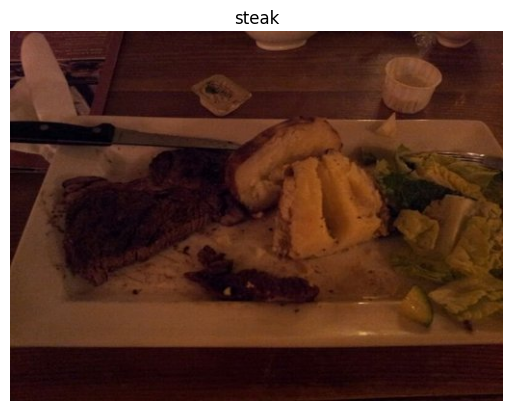

In [9]:
# View a random image from the training dataset
img = view_random_image(
    target_dir="pizza_steak/train/",
    target_class="steak"
)

In [10]:
# View the img (actually just a big array/tensor)
img

array([[[62, 26, 30],
        [62, 26, 28],
        [61, 22, 25],
        ...,
        [70, 37, 32],
        [70, 37, 32],
        [68, 35, 30]],

       [[63, 27, 31],
        [62, 26, 30],
        [63, 24, 27],
        ...,
        [68, 35, 30],
        [67, 34, 29],
        [65, 32, 27]],

       [[63, 23, 31],
        [61, 22, 27],
        [63, 22, 26],
        ...,
        [66, 33, 26],
        [66, 33, 26],
        [65, 32, 25]],

       ...,

       [[31, 10,  7],
        [32, 11,  8],
        [34, 10,  8],
        ...,
        [44, 16, 15],
        [44, 15, 17],
        [44, 16, 15]],

       [[29,  9,  8],
        [32, 12, 11],
        [34, 13, 12],
        ...,
        [47, 17, 15],
        [48, 18, 18],
        [48, 18, 16]],

       [[27,  7,  6],
        [30, 10,  9],
        [33, 12, 11],
        ...,
        [44, 13, 11],
        [44, 13, 11],
        [46, 15, 13]]], dtype=uint8)

In [11]:
# View the image shape
img.shape # returns (width, height, colour channels)

(384, 512, 3)

In [12]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.24313725, 0.10196078, 0.11764706],
        [0.24313725, 0.10196078, 0.10980392],
        [0.23921569, 0.08627451, 0.09803922],
        ...,
        [0.2745098 , 0.14509804, 0.1254902 ],
        [0.2745098 , 0.14509804, 0.1254902 ],
        [0.26666667, 0.1372549 , 0.11764706]],

       [[0.24705882, 0.10588235, 0.12156863],
        [0.24313725, 0.10196078, 0.11764706],
        [0.24705882, 0.09411765, 0.10588235],
        ...,
        [0.26666667, 0.1372549 , 0.11764706],
        [0.2627451 , 0.13333333, 0.11372549],
        [0.25490196, 0.1254902 , 0.10588235]],

       [[0.24705882, 0.09019608, 0.12156863],
        [0.23921569, 0.08627451, 0.10588235],
        [0.24705882, 0.08627451, 0.10196078],
        ...,
        [0.25882353, 0.12941176, 0.10196078],
        [0.25882353, 0.12941176, 0.10196078],
        [0.25490196, 0.1254902 , 0.09803922]],

       ...,

       [[0.12156863, 0.03921569, 0.02745098],
        [0.1254902 , 0.04313725, 0.03137255],
        [0.13333333, 0

### Building a first model
1. Load images
2. Pre-process images (normalization)
3. Build a CNN to find patterns in the images
4. Compile the CNN
5. Fit the CNN to train the data

In [13]:
import tensorflow as tf

# Setup gpu drivers
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

2023-07-08 18:48:19.243355: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 18:48:19.873760: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-08 18:48:20.951398: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-08 18:48:21.017519: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

In [14]:
# Create a first model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32, # number of images to process at a time 
    target_size=(224, 224), # convert all images to be 224 x 224
    class_mode="binary", # type of problem we're working on
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10, 
        kernel_size=3, # can also be (3, 3)
        activation="relu", 
        input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


2023-07-08 18:48:21.187916: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.6057 - accuracy: 0.6667

2023-07-08 18:48:36.991079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 17s 347ms/step - loss: 0.6057 - accuracy: 0.6667 - val_loss: 0.4187 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 16s 346ms/step - loss: 0.4429 - accuracy: 0.8040 - val_loss: 0.3875 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 16s 346ms/step - loss: 0.3994 - accuracy: 0.8360 - val_loss: 0.3572 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 16s 341ms/step - loss: 0.3505 - accuracy: 0.8647 - val_loss: 0.3377 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 16s 341ms/step - loss: 0.3031 - accuracy: 0.8773 - val_loss: 0.3457 - val_accuracy: 0.8560


In [15]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### Using the model from the classification notebook

In [16]:
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_2 = model_2.fit(
    train_data, # use same training data created above
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data, # use same validation data created above
    validation_steps=len(valid_data)
)

Epoch 1/5


2023-07-08 18:49:42.733884: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 1.1435 - accuracy: 0.5193

2023-07-08 18:49:45.142374: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 3s 58ms/step - loss: 1.1435 - accuracy: 0.5193 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 3s 62ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 3s 57ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 3s 59ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 3s 62ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [17]:
# Check out our second model's architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [18]:
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as inputtf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5


2023-07-08 18:49:57.187809: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 4.4385 - accuracy: 0.6113

2023-07-08 18:50:02.863238: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 6s 127ms/step - loss: 4.4385 - accuracy: 0.6113 - val_loss: 0.5668 - val_accuracy: 0.7000
Epoch 2/5
47/47 [==============================] - 6s 119ms/step - loss: 1.3218 - accuracy: 0.6693 - val_loss: 1.2993 - val_accuracy: 0.6760
Epoch 3/5
47/47 [==============================] - 6s 122ms/step - loss: 1.0643 - accuracy: 0.6913 - val_loss: 0.5678 - val_accuracy: 0.7320
Epoch 4/5
47/47 [==============================] - 6s 120ms/step - loss: 0.5096 - accuracy: 0.7600 - val_loss: 0.7020 - val_accuracy: 0.6840
Epoch 5/5
47/47 [==============================] - 6s 124ms/step - loss: 0.4865 - accuracy: 0.7833 - val_loss: 0.4344 - val_accuracy: 0.7900


In [19]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary classification

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

### 1. Import and become one with the data

In [20]:
# import zipfile

# # Download zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

Image shape: (512, 512, 3)
Image shape: (382, 512, 3)


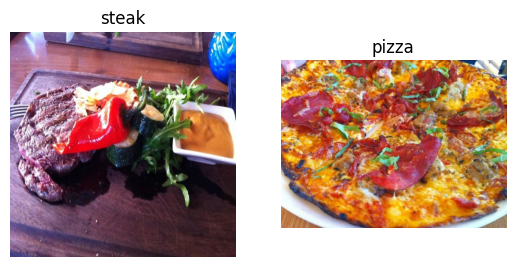

In [21]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data

In [22]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [23]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.) # All pixels between 0 and 1 # All pixels between 0 and 1
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [26]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [27]:
# View the first batch of labels (0 is pizza, 1 is steak)
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a model

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [29]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
    Conv2D(filters=10, 
           kernel_size=3, 
           strides=1,
           padding='valid',
           activation='relu', 
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [30]:
# Compile the model
model_4.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

**Conv2D Parameters**
- filters - these are the number of "feature extractors" that will be moving over our images.
- kernel_size - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
- stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
- padding - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

Understanding Hyperparameters (https://poloclub.github.io/cnn-explainer/)

In [31]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [33]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [34]:
# Fit the model
history_4 = model_4.fit(
    train_data, # combination of labels and sample data
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5


2023-07-09 01:30:30.491870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 1.1919 - accuracy: 0.5907

2023-07-09 01:30:50.766372: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 21s 443ms/step - loss: 1.1919 - accuracy: 0.5907 - val_loss: 0.5322 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 20s 428ms/step - loss: 0.4801 - accuracy: 0.7920 - val_loss: 0.4244 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 20s 425ms/step - loss: 0.3817 - accuracy: 0.8407 - val_loss: 0.4002 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 20s 418ms/step - loss: 0.2625 - accuracy: 0.9040 - val_loss: 0.4028 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 21s 444ms/step - loss: 0.1620 - accuracy: 0.9373 - val_loss: 0.4012 - val_accuracy: 0.8340


### 5. Evaluate the model

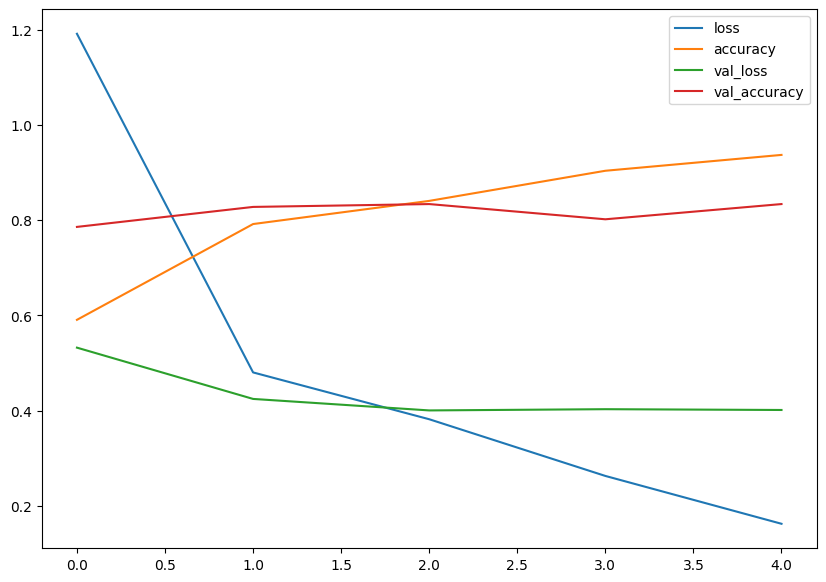

In [35]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [36]:
# Plot the validation and training data separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """ 
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

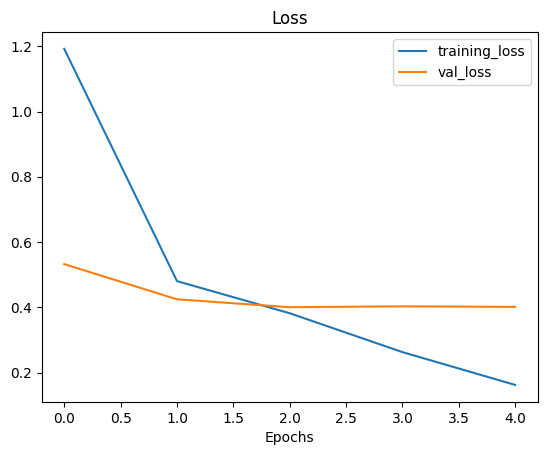

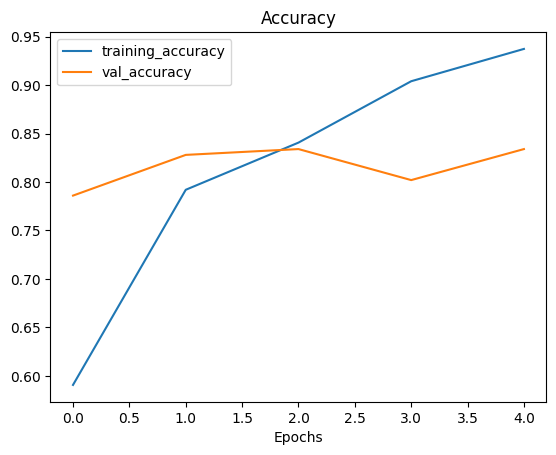

In [37]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

When there is a big gap between the training accuracy and the validation accuracy, then it means it is overfitting (most probably). Ideally, the curves should follow each other, or the validation curve be slightly under the training curve.

In [38]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 6. Adjust the model parameters

There are three steps to fit a machine learning model:
1. Create a baseline
2. Beat the baseline by overfitting
3. Reduce the overfitting

To overfit a model, things that can be done:
* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.

To reduce the overfitting, a few things that can be done:
* Add data augmentation
* Add regularization layers (like the MaxPool2D)
* Add more data

Next two models are going to be built:
1. A ConvNet with [max pooling](https://deeplizard.com/learn/video/ZjM_XQa5s6s)
2. A ConvNet with [max pooling](https://deeplizard.com/learn/video/ZjM_XQa5s6s) and data augmentation

In [39]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2), # reduce number of features by half
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [40]:
# Compile model (same as model_4)
model_5.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [41]:
# Fit the model
history_5 = model_5.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5


2023-07-09 02:02:52.736624: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.6451 - accuracy: 0.6313

2023-07-09 02:02:59.117071: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 7s 146ms/step - loss: 0.6451 - accuracy: 0.6313 - val_loss: 0.5330 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 7s 144ms/step - loss: 0.5013 - accuracy: 0.7640 - val_loss: 0.4291 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 7s 143ms/step - loss: 0.4800 - accuracy: 0.7767 - val_loss: 0.4077 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 7s 139ms/step - loss: 0.4521 - accuracy: 0.8013 - val_loss: 0.4143 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 6s 137ms/step - loss: 0.4083 - accuracy: 0.8213 - val_loss: 0.3643 - val_accuracy: 0.8800


In [42]:
# Check out the model architecture
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

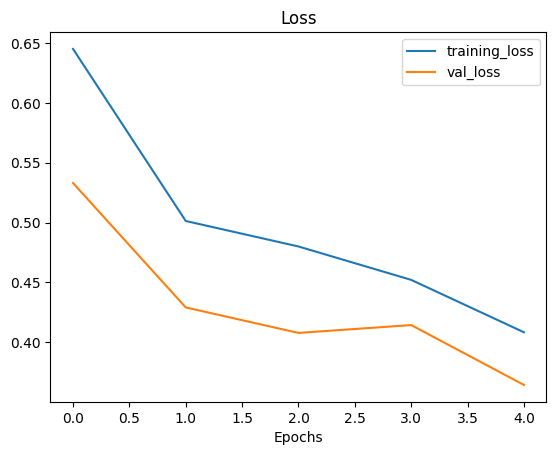

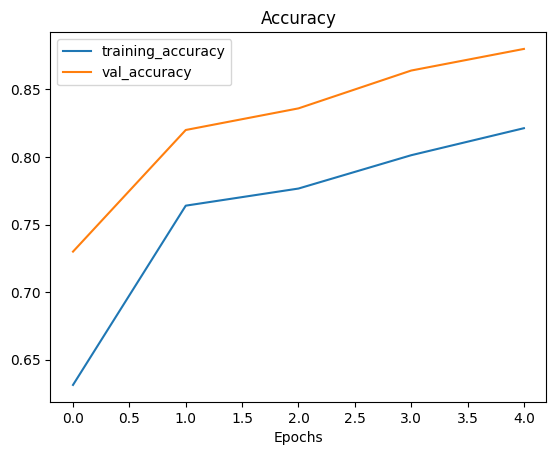

In [43]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

In [44]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
    shear_range=0.2, # shear the image
    zoom_range=0.2, # zoom into the image
    width_shift_range=0.2, # shift the image width ways
    height_shift_range=0.2, # shift the image height ways
    horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [45]:

# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [46]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

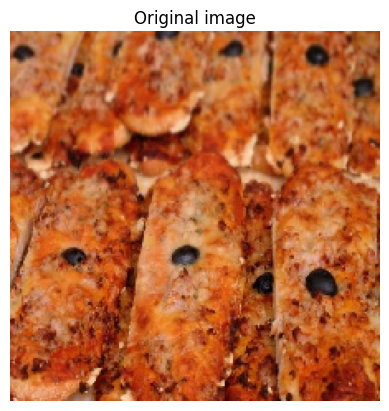

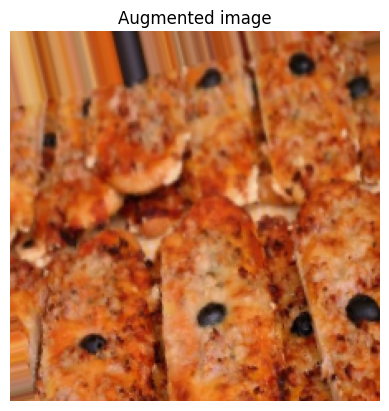

In [48]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [49]:
# Create the model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2), # reduce number of features by half
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Fit the model
history_6 = model_6.fit(
    train_data_augmented, # changed to augmented training data
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5


2023-07-09 02:15:25.704216: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.7226 - accuracy: 0.4367

2023-07-09 02:15:37.641292: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 13s 262ms/step - loss: 0.7226 - accuracy: 0.4367 - val_loss: 0.6886 - val_accuracy: 0.5080
Epoch 2/5
47/47 [==============================] - 13s 278ms/step - loss: 0.6969 - accuracy: 0.4960 - val_loss: 0.6902 - val_accuracy: 0.5640
Epoch 3/5
47/47 [==============================] - 12s 254ms/step - loss: 0.6897 - accuracy: 0.5707 - val_loss: 0.6939 - val_accuracy: 0.5080
Epoch 4/5
47/47 [==============================] - 12s 253ms/step - loss: 0.7045 - accuracy: 0.4440 - val_loss: 0.6890 - val_accuracy: 0.5140
Epoch 5/5
47/47 [==============================] - 12s 257ms/step - loss: 0.6969 - accuracy: 0.5867 - val_loss: 0.6894 - val_accuracy: 0.6300


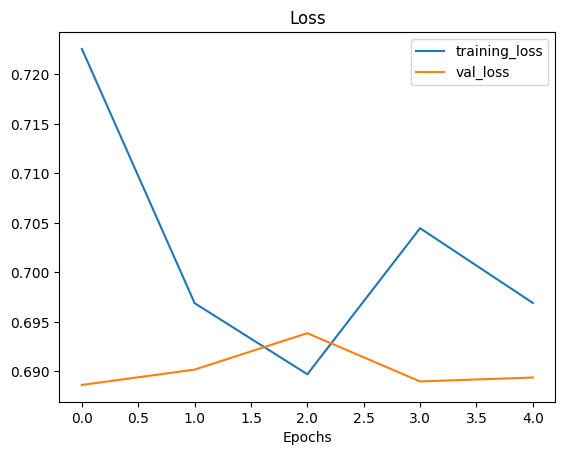

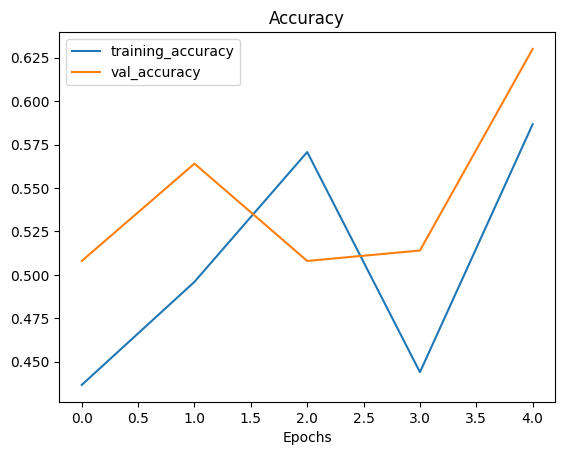

In [50]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

In [51]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [52]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(
    train_data_augmented_shuffled, # now the augmented data is shuffled
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data))

Epoch 1/5


2023-07-09 02:18:10.750366: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.6342 - accuracy: 0.6280

2023-07-09 02:18:22.592655: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 13s 258ms/step - loss: 0.6342 - accuracy: 0.6280 - val_loss: 0.5785 - val_accuracy: 0.6900
Epoch 2/5
47/47 [==============================] - 12s 259ms/step - loss: 0.5854 - accuracy: 0.6860 - val_loss: 0.4246 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 12s 261ms/step - loss: 0.5269 - accuracy: 0.7393 - val_loss: 0.4133 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 13s 268ms/step - loss: 0.4912 - accuracy: 0.7767 - val_loss: 0.3584 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 13s 272ms/step - loss: 0.5039 - accuracy: 0.7633 - val_loss: 0.3594 - val_accuracy: 0.8460


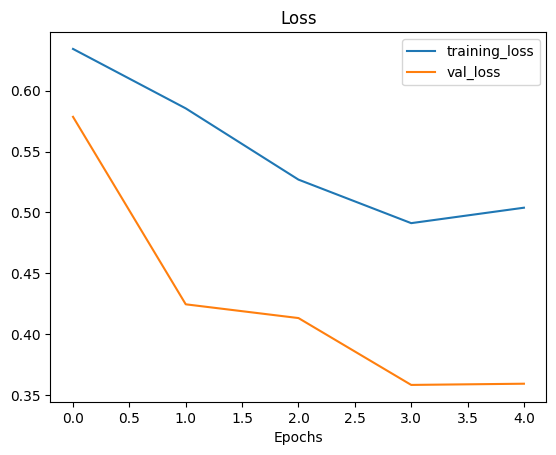

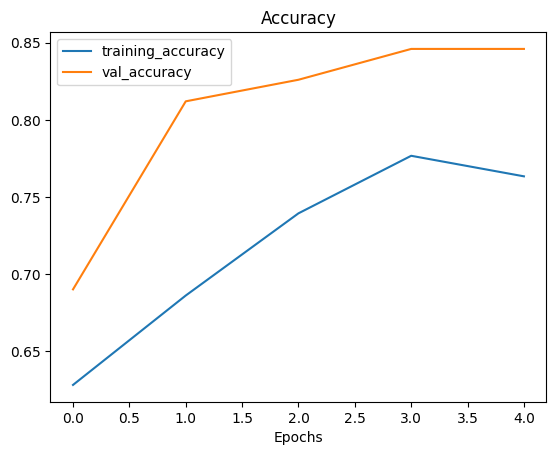

In [53]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

### 7. Repeat until satisified

The baseline was beaten. There are a few things to continue improving the model:
* Increase the number of model layers
* Increase the number of filters in each convulotional layer
* Train for longer
* Finding an ideal learning rate
* Get more data
* Use **transfer learning** to leverage what another learning model has learned and adjust it for our own use case.

In [54]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(
    train_data_augmented_shuffled,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data))

Epoch 1/5


2023-07-09 02:24:31.690777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.7237 - accuracy: 0.5840

2023-07-09 02:24:47.055221: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 16s 334ms/step - loss: 0.7237 - accuracy: 0.5840 - val_loss: 0.5908 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 16s 335ms/step - loss: 0.5876 - accuracy: 0.7020 - val_loss: 0.4573 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 16s 345ms/step - loss: 0.5513 - accuracy: 0.7260 - val_loss: 0.4231 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 17s 351ms/step - loss: 0.5237 - accuracy: 0.7653 - val_loss: 0.4010 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 16s 330ms/step - loss: 0.5077 - accuracy: 0.7767 - val_loss: 0.3795 - val_accuracy: 0.8660


In [55]:
# Check model_1 architecture (same as model_8)
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [56]:
# Check model_8 architecture (same as model_1)
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

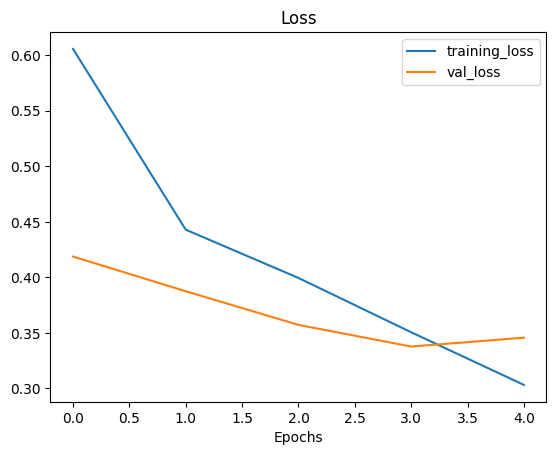

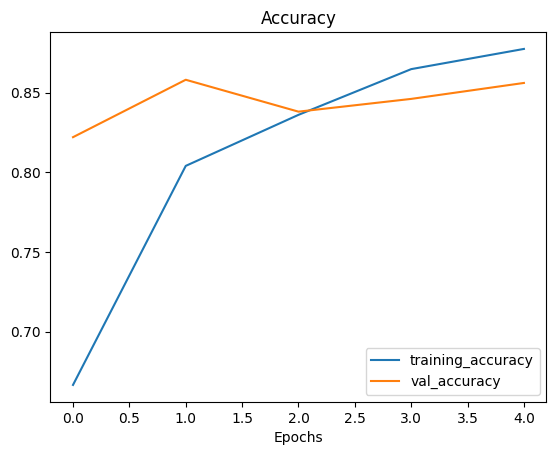

In [58]:
# Check out the first model training curve
plot_loss_curves(history_1)

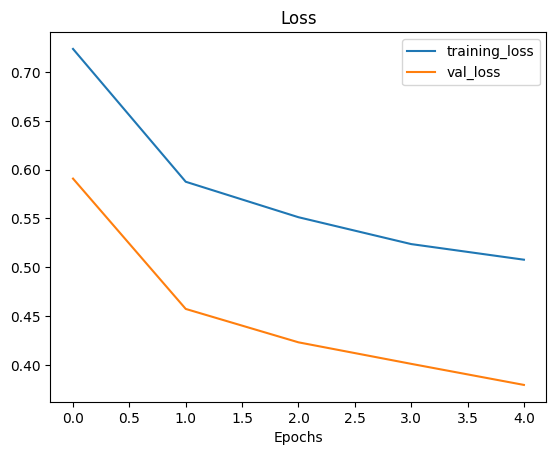

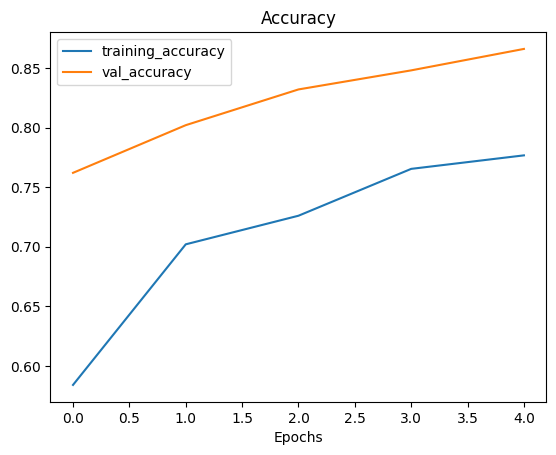

In [59]:
# Compare it with the TinyVGG model performance
plot_loss_curves(history_8)

### Making a prediction with our trained model

In [60]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-07-09 02:35:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1,9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1,89M  --.-KB/s    in 0,1s    

2023-07-09 02:35:15 (19,8 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



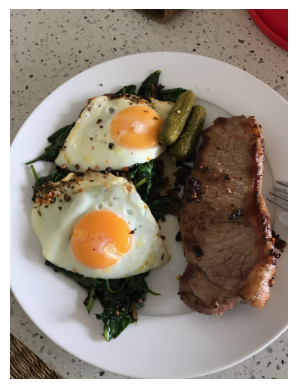

In [61]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [62]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [63]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor
    and reshapes it to (img_shape, img_shape, colour_channel).
    """
    # Read in target file (an image)
    img = tf.io.read_file(filename)

    # Decode the read file into a tensor & ensure 3 colour channels 
    # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
    img = tf.image.decode_image(img, channels=3)

    # Resize the image (to the same size our model was trained on)
    img = tf.image.resize(img, size = [img_shape, img_shape])

    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img

In [64]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [66]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [67]:
# Make a prediction on custom image tensor
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 37ms/step


array([[0.7332511]], dtype=float32)

In [68]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [69]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [70]:
def pred_and_plot(model, filename, class_names):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred)[0][0])]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 10ms/step


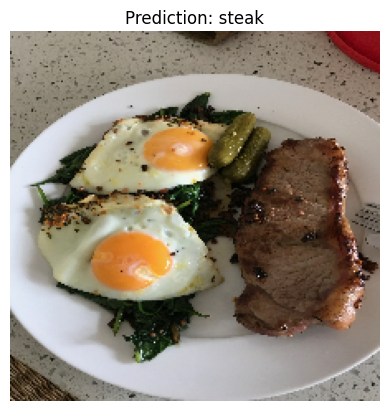

In [71]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2023-07-09 02:38:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2,7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2,74M  --.-KB/s    in 0,1s    

2023-07-09 02:38:10 (21,3 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 11ms/step


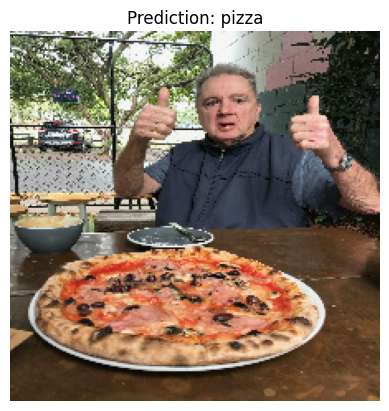

In [72]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

# Multi-class Classification

### 1. Import and become one with the data

In [73]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-07-09 02:40:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2800:3f0:4004:804::2010, 2800:3f0:4004:805::2010, 2800:3f0:4004:806::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2800:3f0:4004:804::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495,13M  23,1MB/s    in 24s     

2023-07-09 02:41:07 (20,6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [74]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 

In [75]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [76]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 383, 3)


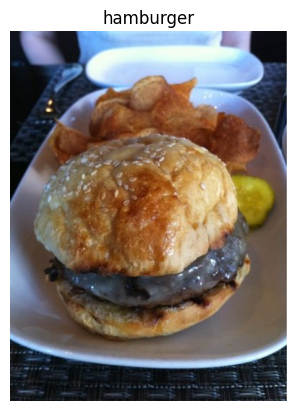

In [79]:
# View a random image from the training dataset
import random
img = view_random_image(
    target_dir=train_dir,
    target_class=random.choice(class_names)) # get a random class name

### 2. Preprocess the data (prepare it for a model)

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

Small tweaks for multi-class classification
* Changing the output layer to use have 10 ouput neurons (the same number as the number of classes we have).
* Changing the output layer to use 'softmax' activation instead of 'sigmoid' activation.
* Changing the loss function to be 'categorical_crossentropy' instead of 'binary_crossentropy'.

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(
    loss="categorical_crossentropy", # changed to categorical_crossentropy
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

### 4. Fit a model

In [83]:
# Fit the model
history_9 = model_9.fit(
    train_data, # now 10 different classes 
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data))

Epoch 1/5


2023-07-09 02:44:30.608700: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


235/235 [==============================] - ETA: 0s - loss: 2.1143 - accuracy: 0.2256

2023-07-09 02:45:46.275243: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


235/235 [==============================] - 80s 339ms/step - loss: 2.1143 - accuracy: 0.2256 - val_loss: 2.0147 - val_accuracy: 0.2848
Epoch 2/5
235/235 [==============================] - 79s 337ms/step - loss: 1.8828 - accuracy: 0.3467 - val_loss: 1.9290 - val_accuracy: 0.3292
Epoch 3/5
235/235 [==============================] - 80s 338ms/step - loss: 1.7003 - accuracy: 0.4219 - val_loss: 1.8687 - val_accuracy: 0.3384
Epoch 4/5
235/235 [==============================] - 81s 343ms/step - loss: 1.3684 - accuracy: 0.5473 - val_loss: 2.0061 - val_accuracy: 0.3272
Epoch 5/5
235/235 [==============================] - 82s 347ms/step - loss: 0.8925 - accuracy: 0.7147 - val_loss: 2.3570 - val_accuracy: 0.3312


### 5. Evaluate the model

In [84]:
# Evaluate on the test data
model_9.evaluate(test_data)

 2/79 [..............................] - ETA: 4s - loss: 2.4307 - accuracy: 0.2812

2023-07-09 02:51:11.647371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


79/79 [==============================] - 4s 52ms/step - loss: 2.3570 - accuracy: 0.3312


[2.3570384979248047, 0.3312000036239624]

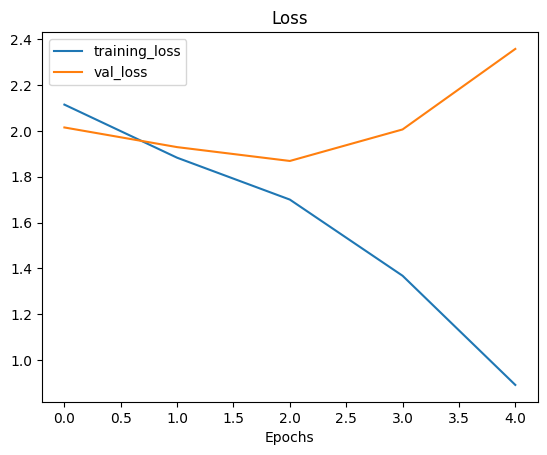

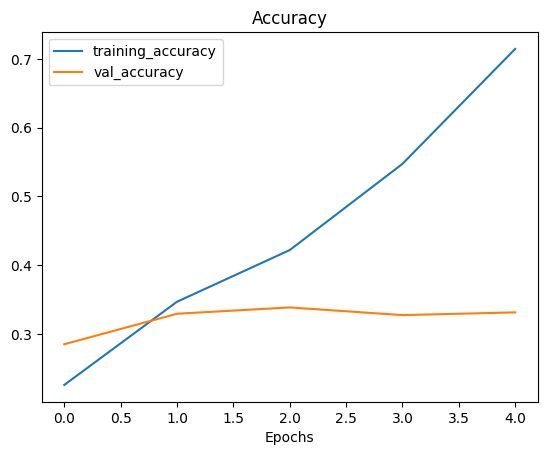

In [85]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_9)

### 6. Adjust the model parameters

The model is overfitting, therefore we have to reduce overfitting

In [86]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_10.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

history_10 = model_10.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data))

Epoch 1/5


2023-07-09 02:51:55.450852: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


235/235 [==============================] - ETA: 0s - loss: 2.1291 - accuracy: 0.2244

2023-07-09 02:52:22.623412: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


235/235 [==============================] - 31s 129ms/step - loss: 2.1291 - accuracy: 0.2244 - val_loss: 1.9507 - val_accuracy: 0.3220
Epoch 2/5
235/235 [==============================] - 30s 127ms/step - loss: 1.7488 - accuracy: 0.4059 - val_loss: 1.8715 - val_accuracy: 0.3504
Epoch 3/5
235/235 [==============================] - 30s 129ms/step - loss: 1.3151 - accuracy: 0.5713 - val_loss: 1.9737 - val_accuracy: 0.3396
Epoch 4/5
235/235 [==============================] - 30s 128ms/step - loss: 0.7829 - accuracy: 0.7653 - val_loss: 2.1892 - val_accuracy: 0.3376
Epoch 5/5
235/235 [==============================] - 30s 127ms/step - loss: 0.3786 - accuracy: 0.8993 - val_loss: 2.7929 - val_accuracy: 0.2912


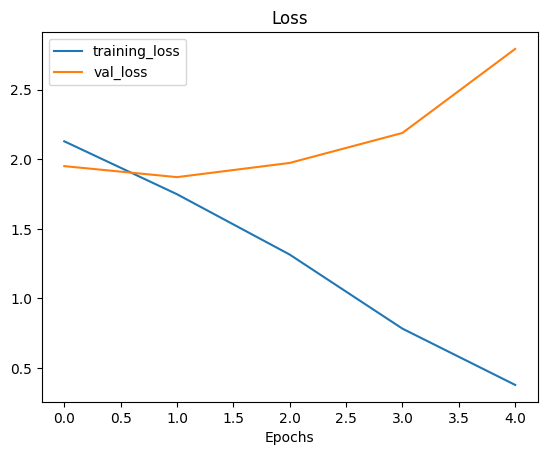

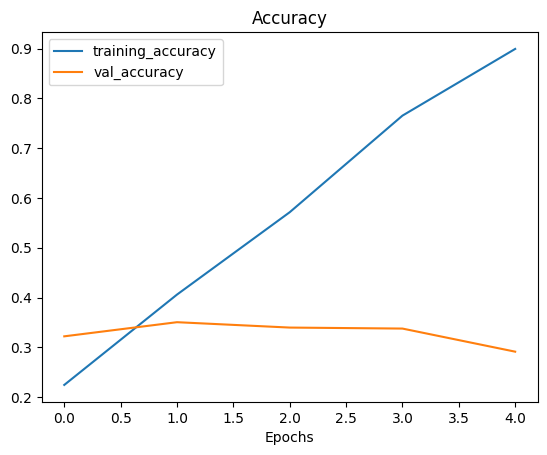

In [87]:
# Check out the loss curves of model_10
plot_loss_curves(history_10)

In [88]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=20, # note: this is an int not a float
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [89]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(
    train_data_augmented, # use augmented data
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data))

Epoch 1/5


2023-07-09 02:54:26.807657: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


235/235 [==============================] - ETA: 0s - loss: 2.2360 - accuracy: 0.1891

2023-07-09 02:55:23.484309: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


235/235 [==============================] - 60s 255ms/step - loss: 2.2360 - accuracy: 0.1891 - val_loss: 2.0441 - val_accuracy: 0.2740
Epoch 2/5
235/235 [==============================] - 59s 251ms/step - loss: 2.0931 - accuracy: 0.2532 - val_loss: 2.0393 - val_accuracy: 0.2708
Epoch 3/5
235/235 [==============================] - 59s 253ms/step - loss: 2.0718 - accuracy: 0.2589 - val_loss: 1.9601 - val_accuracy: 0.3060
Epoch 4/5
235/235 [==============================] - 60s 255ms/step - loss: 2.0535 - accuracy: 0.2671 - val_loss: 1.9875 - val_accuracy: 0.3084
Epoch 5/5
235/235 [==============================] - 59s 249ms/step - loss: 2.0371 - accuracy: 0.2799 - val_loss: 1.9016 - val_accuracy: 0.3432


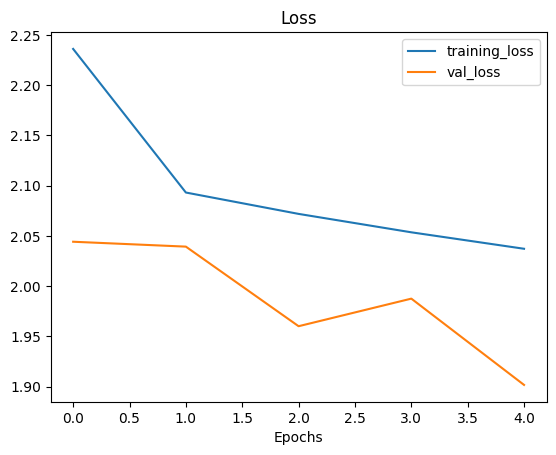

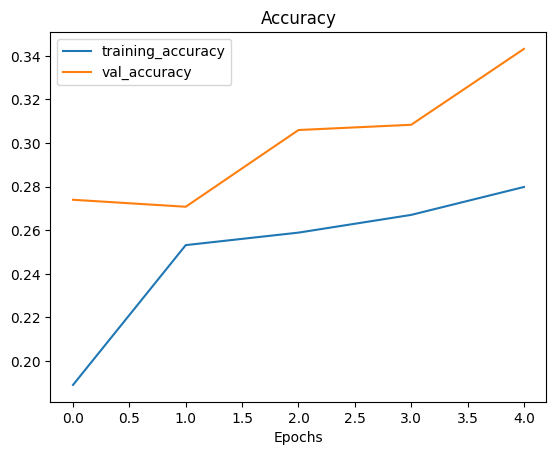

In [90]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

### 7. Repeat until satisfied

Won't be done now, but it can be done same that step 7 in the biclassification model.

Transfer learning will be reserved for next chapter.

### Making a prediction with our trained model

In [92]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [93]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [100]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    if len(pred[0]) > 1: # check for multi-class
        pred_class = class_names[pred.argmax()] # if more than one output, take the max
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 10ms/step


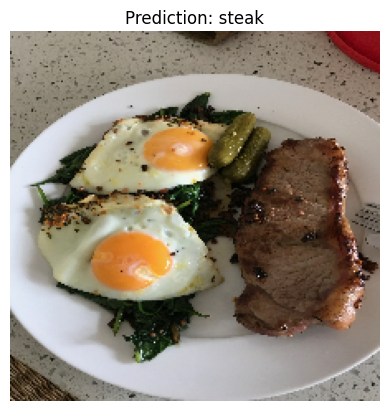

In [101]:
# Make a prediction using model_11
pred_and_plot(model_11, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 10ms/step


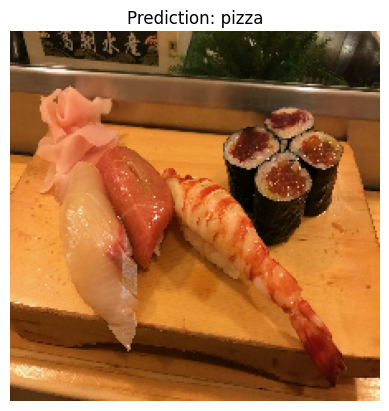

In [102]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 10ms/step


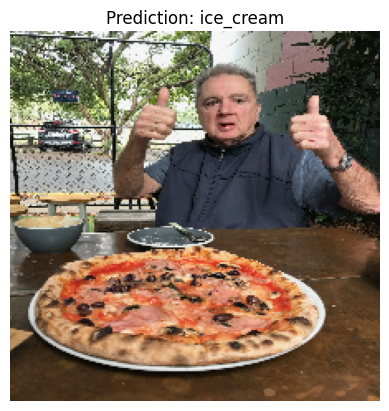

In [103]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 10ms/step


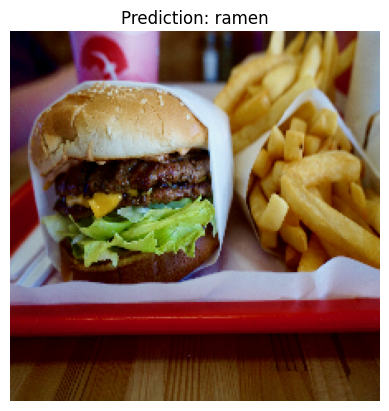

In [104]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

### Saving and loading our model

In [105]:
# Save a model
model_11.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


INFO:tensorflow:Assets written to: saved_trained_model/assets


In [106]:
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

 1/79 [..............................] - ETA: 11s - loss: 1.6701 - accuracy: 0.4375

2023-07-09 03:00:41.670975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


79/79 [==============================] - 4s 43ms/step - loss: 1.9016 - accuracy: 0.3432


[1.90164315700531, 0.3431999981403351]

In [107]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)

 3/79 [>.............................] - ETA: 3s - loss: 1.9159 - accuracy: 0.3021

2023-07-09 03:00:53.978288: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


79/79 [==============================] - 3s 43ms/step - loss: 1.9016 - accuracy: 0.3432


[1.9016435146331787, 0.3431999981403351]